### ETH & BTC Combined EDA

#### Step 1: Load BTC & ETH Data
First, let's load the two datasets and inspect them.

In [17]:
import pandas as pd

# Load BTC dataset
btc_file_path = "/Users/halladaykinsey/Desktop/btcusd_1-min_data.csv"
btc_df = pd.read_csv(btc_file_path)
btc_df["Asset"] = "BTC"

# Load ETH dataset
eth_file_path = "/Users/halladaykinsey/Desktop/ETH_1min.csv"
eth_df = pd.read_csv(eth_file_path)
eth_df["Asset"] = "ETH"

print("BTC Data Sample:")
print(btc_df.head())

print("\nETH Data Sample:")
print(eth_df.head())

BTC Data Sample:
      Timestamp  Open  High   Low  Close  Volume Asset
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC

ETH Data Sample:
   Unix Timestamp                 Date  Symbol    Open    High     Low  \
0   1586995200000  2020-04-16 00:00:00  ETHUSD  152.94  152.94  151.33   
1   1586995140000  2020-04-15 23:59:00  ETHUSD  152.94  152.94  152.94   
2   1586995080000  2020-04-15 23:58:00  ETHUSD  153.17  153.17  152.94   
3   1586995020000  2020-04-15 23:57:00  ETHUSD  152.96  153.20  152.96   
4   1586994960000  2020-04-15 23:56:00  ETHUSD  153.14  153.14  152.96   

    Close      Volume Asset  
0  151.33  112.724931   ETH  
1  152.94    0.000000   ETH  
2  152.94    0.013011   ETH  
3  153.17  466.782278   ETH  
4  152.96  167.930714   ETH  


In [18]:
# Standardizing column names
btc_df.rename(columns={"Timestamp": "Unix Timestamp"}, inplace=True)
eth_df.rename(columns={"Date": "Datetime"}, inplace=True)

# Convert UNIX timestamp to a proper datetime format
btc_df["Datetime"] = pd.to_datetime(btc_df["Unix Timestamp"], unit="s")
eth_df["Datetime"] = pd.to_datetime(eth_df["Datetime"])

# Drop redundant timestamp columns
btc_df.drop(columns=["Unix Timestamp"], inplace=True)
eth_df.drop(columns=["Unix Timestamp"], inplace=True)

# Ensure numerical consistency
btc_df = btc_df[['Datetime', 'Asset', 'Open', 'High', 'Low', 'Close', 'Volume']]
eth_df = eth_df[['Datetime', 'Asset', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [19]:
# Checking date ranges
print(f"BTC Date Range: {btc_df['Datetime'].min()} to {btc_df['Datetime'].max()}")
print(f"ETH Date Range: {eth_df['Datetime'].min()} to {eth_df['Datetime'].max()}")

BTC Date Range: 2012-01-01 10:01:00 to 2025-03-09 00:00:00
ETH Date Range: 2016-05-09 13:32:00 to 2020-04-16 00:00:00


In [20]:
# Finding overlapping time range
start_date = eth_df["Datetime"].min()
end_date = eth_df["Datetime"].max()

# Trimming BTC
btc_df = btc_df[(btc_df["Datetime"] >= start_date) & (btc_df["Datetime"] <= end_date)]

In [21]:
# Resample to 1-min intervals
btc_df.set_index("Datetime", inplace=True)
eth_df.set_index("Datetime", inplace=True)

btc_df = btc_df.resample("1T").ffill()
eth_df = eth_df.resample("1T").ffill()

btc_df.reset_index(inplace=True)
eth_df.reset_index(inplace=True)

In [22]:
# Merging on Datetime
combined_df = pd.merge(btc_df, eth_df, on="Datetime", suffixes=("_BTC", "_ETH"))

print(combined_df.info())
print(combined_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069909 entries, 0 to 2069908
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Datetime    datetime64[ns]
 1   Asset_BTC   object        
 2   Open_BTC    float64       
 3   High_BTC    float64       
 4   Low_BTC     float64       
 5   Close_BTC   float64       
 6   Volume_BTC  float64       
 7   Asset_ETH   object        
 8   Open_ETH    float64       
 9   High_ETH    float64       
 10  Low_ETH     float64       
 11  Close_ETH   float64       
 12  Volume_ETH  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 205.3+ MB
None
             Datetime Asset_BTC  Open_BTC  High_BTC  Low_BTC  Close_BTC  \
0 2016-05-09 13:32:00       BTC    457.00    457.00   457.00     457.00   
1 2016-05-09 13:33:00       BTC    457.00    457.00   457.00     457.00   
2 2016-05-09 13:34:00       BTC    457.00    457.00   457.00     457.00   
3 2016-05-09 13:35:00       

In [8]:
combined_df.to_csv("/Users/halladaykinsey/capstone-project/combined_crypto_data.csv", index=False)

#### Visualizing trends & price movement

In [9]:
print(combined_df.info())
print(combined_df.describe())
print(combined_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069909 entries, 0 to 2069908
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Datetime    datetime64[ns]
 1   Asset_BTC   object        
 2   Open_BTC    float64       
 3   High_BTC    float64       
 4   Low_BTC     float64       
 5   Close_BTC   float64       
 6   Volume_BTC  float64       
 7   Asset_ETH   object        
 8   Open_ETH    float64       
 9   High_ETH    float64       
 10  Low_ETH     float64       
 11  Close_ETH   float64       
 12  Volume_ETH  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 205.3+ MB
None
                            Datetime      Open_BTC      High_BTC  \
count                        2069909  2.069909e+06  2.069909e+06   
mean   2018-04-28 06:45:59.999995136  5.481630e+03  5.485532e+03   
min              2016-05-09 13:32:00  4.350000e+02  4.351300e+02   
25%              2017-05-03 22:09:00  1.484000e+03  1.48

1. CLOSE

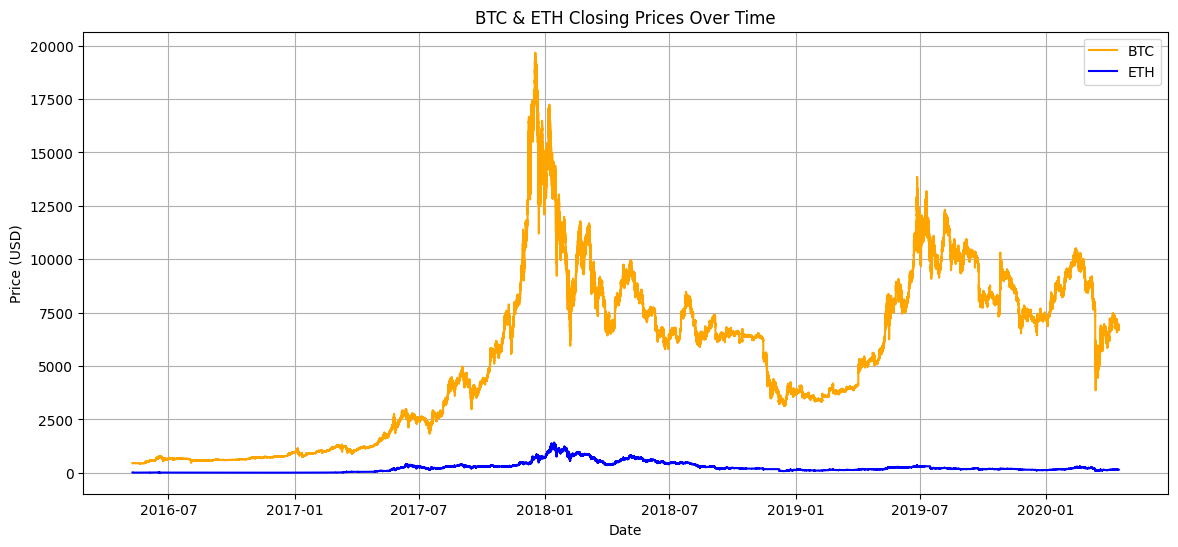

In [10]:
# Plotting close
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y="Close_BTC", label="BTC", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="Close_ETH", label="ETH", color="blue")
plt.title("BTC & ETH Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

2. CORRELATION

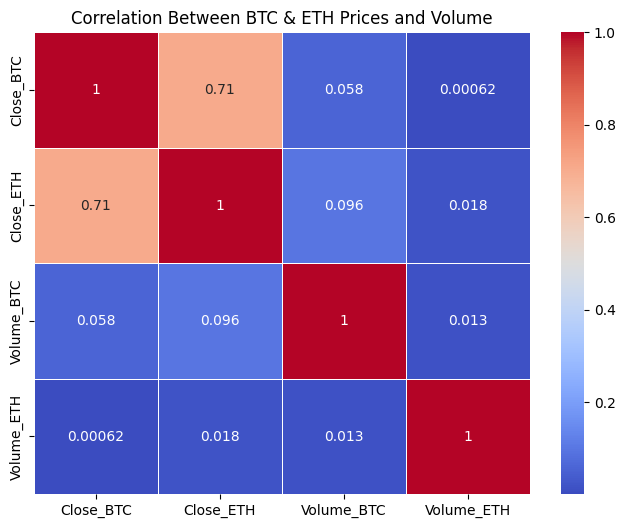

In [11]:
# Computing correlation matrix
correlation_matrix = combined_df[["Close_BTC", "Close_ETH", "Volume_BTC", "Volume_ETH"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between BTC & ETH Prices and Volume")
plt.show()

3. DAILY RETURNS

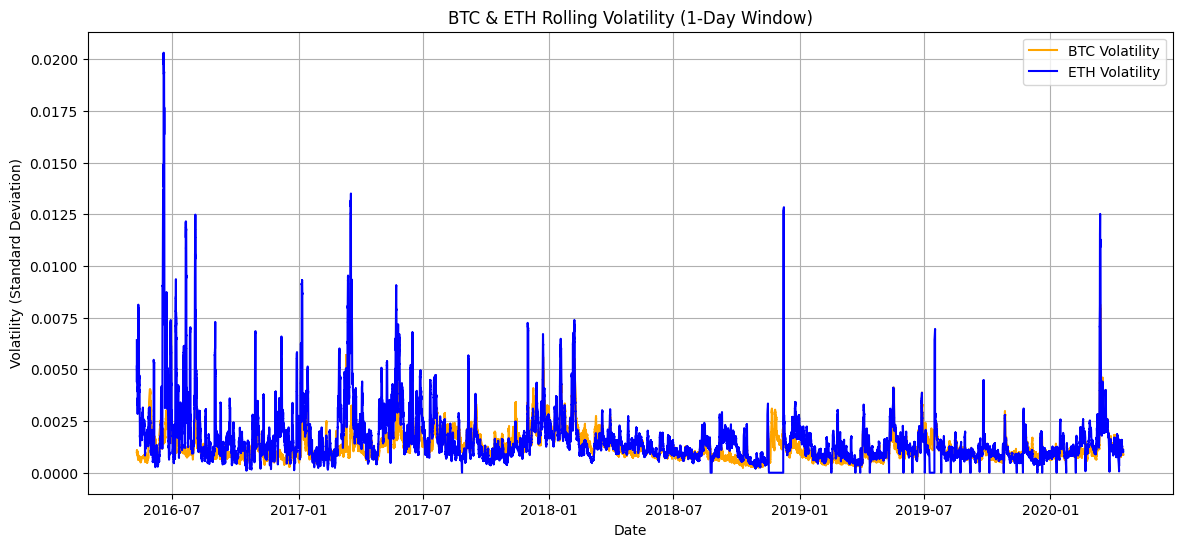

In [12]:
# Computing daily returns
combined_df["Return_BTC"] = combined_df["Close_BTC"].pct_change()
combined_df["Return_ETH"] = combined_df["Close_ETH"].pct_change()

# Rolling volatility (7-day window)
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y=combined_df["Return_BTC"].rolling(1440).std(), label="BTC Volatility", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y=combined_df["Return_ETH"].rolling(1440).std(), label="ETH Volatility", color="blue")
plt.title("BTC & ETH Rolling Volatility (1-Day Window)")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.grid(True)
plt.show()

4. 30 vs 100 vs 200 MOVING AVERAGES

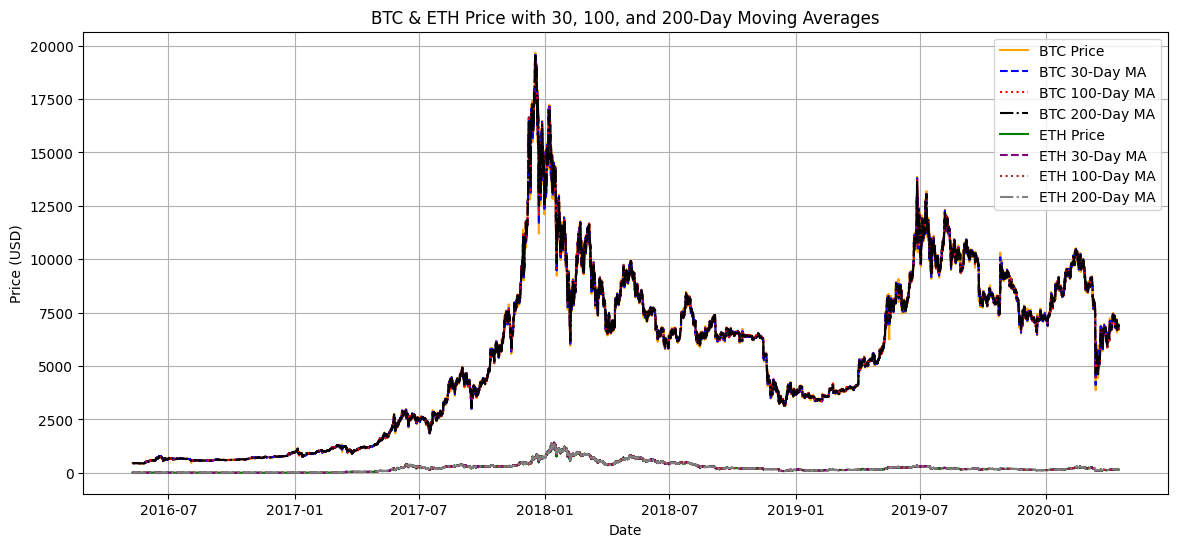

In [13]:
# Computing MAs
combined_df["MA30_BTC"] = combined_df["Close_BTC"].rolling(window=30).mean()
combined_df["MA100_BTC"] = combined_df["Close_BTC"].rolling(window=100).mean()
combined_df["MA200_BTC"] = combined_df["Close_BTC"].rolling(window=200).mean()

combined_df["MA30_ETH"] = combined_df["Close_ETH"].rolling(window=30).mean()
combined_df["MA100_ETH"] = combined_df["Close_ETH"].rolling(window=100).mean()
combined_df["MA200_ETH"] = combined_df["Close_ETH"].rolling(window=200).mean()

plt.figure(figsize=(14, 6))

# BTC
sns.lineplot(data=combined_df, x="Datetime", y="Close_BTC", label="BTC Price", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="MA30_BTC", label="BTC 30-Day MA", linestyle="dashed", color="blue")
sns.lineplot(data=combined_df, x="Datetime", y="MA100_BTC", label="BTC 100-Day MA", linestyle="dotted", color="red")
sns.lineplot(data=combined_df, x="Datetime", y="MA200_BTC", label="BTC 200-Day MA", linestyle="dashdot", color="black")

# ETH 
sns.lineplot(data=combined_df, x="Datetime", y="Close_ETH", label="ETH Price", color="green")
sns.lineplot(data=combined_df, x="Datetime", y="MA30_ETH", label="ETH 30-Day MA", linestyle="dashed", color="purple")
sns.lineplot(data=combined_df, x="Datetime", y="MA100_ETH", label="ETH 100-Day MA", linestyle="dotted", color="brown")
sns.lineplot(data=combined_df, x="Datetime", y="MA200_ETH", label="ETH 200-Day MA", linestyle="dashdot", color="gray")

plt.title("BTC & ETH Price with 30, 100, and 200-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Let's inspect this a little closer. 

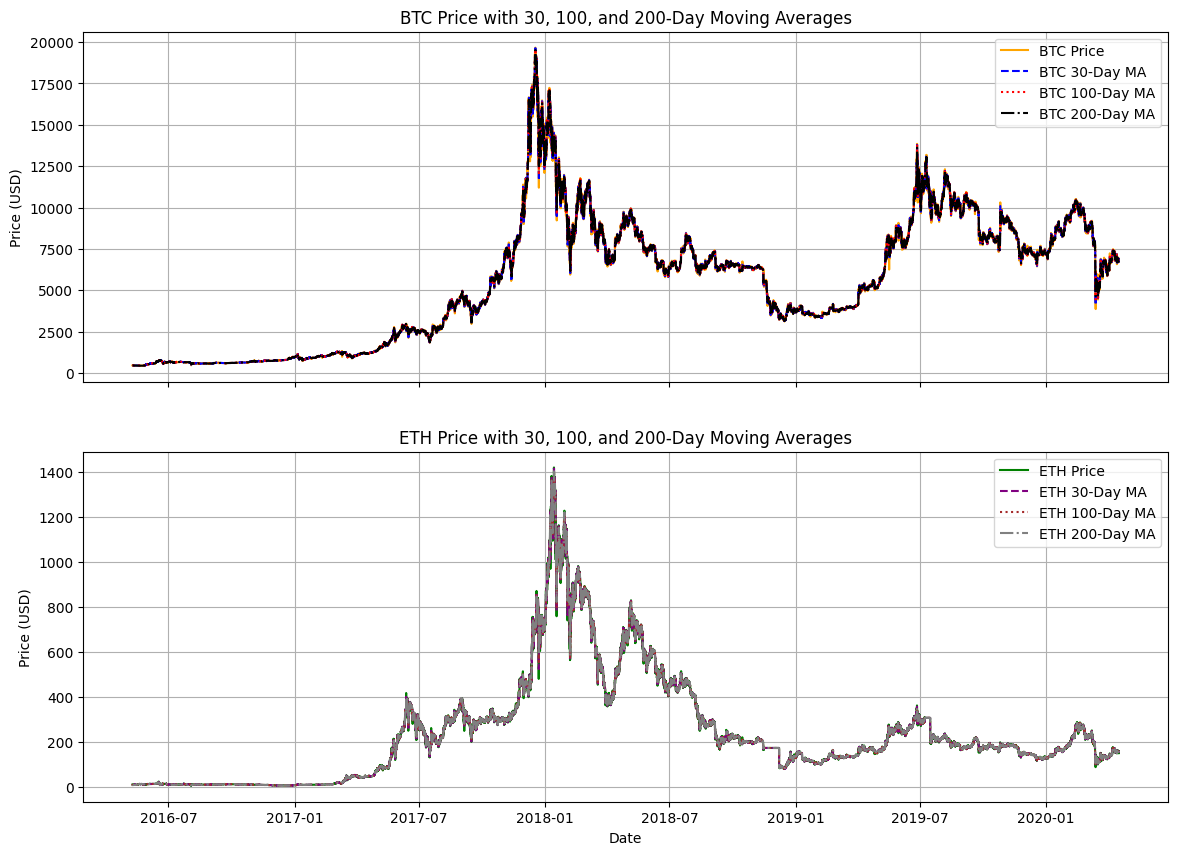

In [14]:
# Fig with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# BTC
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="Close_BTC", label="BTC Price", color="orange")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA30_BTC", label="BTC 30-Day MA", linestyle="dashed", color="blue")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA100_BTC", label="BTC 100-Day MA", linestyle="dotted", color="red")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA200_BTC", label="BTC 200-Day MA", linestyle="dashdot", color="black")

axes[0].set_title("BTC Price with 30, 100, and 200-Day Moving Averages")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# ETH
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="Close_ETH", label="ETH Price", color="green")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA30_ETH", label="ETH 30-Day MA", linestyle="dashed", color="purple")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA100_ETH", label="ETH 100-Day MA", linestyle="dotted", color="brown")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA200_ETH", label="ETH 200-Day MA", linestyle="dashdot", color="gray")

axes[1].set_title("ETH Price with 30, 100, and 200-Day Moving Averages")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

plt.show()

5. VOLUME ANALYSIS

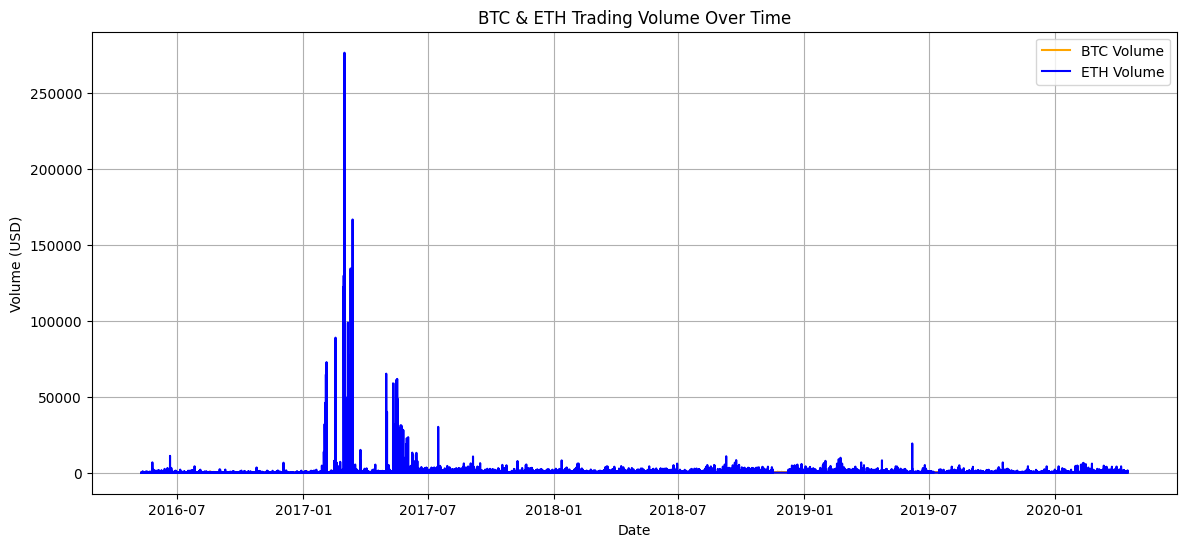

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y="Volume_BTC", label="BTC Volume", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="Volume_ETH", label="ETH Volume", color="blue")
plt.title("BTC & ETH Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Model Framework

#### Breakpoint to load in data from csv

In [1]:
import os
import pandas as pd

# Define file path
file_path = "/Users/halladaykinsey/Desktop/combined_crypto_data.csv"

# Check if saved file exists
if os.path.exists(file_path):
    print("✅ Loading pre-saved dataset...")
    combined_df = pd.read_csv(file_path, parse_dates=["Datetime"])
else:
    print("⚠️ File not found. Merging raw BTC & ETH data...")
    combined_df = pd.merge(btc_df, eth_df, on="Datetime", suffixes=("_BTC", "_ETH"))
    combined_df.to_csv(file_path, index=False)  # Save for next time

# Confirm dataset loaded
print(f"Dataset Loaded: {combined_df.shape}")

✅ Loading pre-saved dataset...
Dataset Loaded: (2069909, 13)


In [2]:
# Selecting only relevant features
features = ["Open_BTC", "High_BTC", "Low_BTC", "Close_BTC", "Volume_BTC",
            "Open_ETH", "High_ETH", "Low_ETH", "Close_ETH", "Volume_ETH"]

target_column = "Close_BTC" 

# Filtering data
df = combined_df[["Datetime"] + features + [target_column]].copy()
df.set_index("Datetime", inplace=True) 
df.dropna(inplace=True) 
print(df.head())

                     Open_BTC  High_BTC  Low_BTC  Close_BTC  Volume_BTC  \
Datetime                                                                  
2016-05-09 13:32:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:33:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:34:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:35:00    456.59    456.59   456.59     456.59    0.022236   
2016-05-09 13:36:00    456.59    456.59   456.59     456.59    0.000000   

                     Open_ETH  High_ETH  Low_ETH  Close_ETH  Volume_ETH  \
Datetime                                                                  
2016-05-09 13:32:00       0.0      12.0      0.0       12.0    4.156276   
2016-05-09 13:33:00      12.0      12.0     10.0       10.0   43.497506   
2016-05-09 13:34:00      10.0      10.0     10.0       10.0    8.000000   
2016-05-09 13:35:00      10.0      10.0     10.0       10.0   60.000000   
2016-05-09 13:36:00     

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit-transforming entire dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

print(df_scaled.head()) 

                     Open_BTC  High_BTC   Low_BTC  Close_BTC  Volume_BTC  \
Datetime                                                                   
2016-05-09 13:32:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:33:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:34:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:35:00  0.001123  0.001116  0.001124   0.001123    0.000014   
2016-05-09 13:36:00  0.001123  0.001116  0.001124   0.001123    0.000000   

                     Open_ETH  High_ETH   Low_ETH  Close_ETH  Volume_ETH  \
Datetime                                                                   
2016-05-09 13:32:00  0.000000  0.004250  0.000000   0.004250    0.000015   
2016-05-09 13:33:00  0.008451  0.004250  0.007043   0.002836    0.000157   
2016-05-09 13:34:00  0.007042  0.002836  0.007043   0.002836    0.000029   
2016-05-09 13:35:00  0.007042  0.002836  0.007043   0.002836    0.000217   
2016-05-09 

In [4]:
# Reducing dataset size by taking every nth row 
sampling_factor = 10  # Keep 10% of the dataset #CHANGE DF SIZE HERE
df_sampled = df_scaled.iloc[::sampling_factor].copy()

print(f"Original dataset shape: {df_scaled.shape}")
print(f"Sampled dataset shape: {df_sampled.shape}")

Original dataset shape: (2069909, 11)
Sampled dataset shape: (206991, 11)


#### CNN

In [5]:
import numpy as np

def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Creating sequences
time_steps = 30  # Using past 30 minutes to predict the next close price
X, y = create_sequences(df_sampled, target_column="Close_BTC", time_steps=time_steps)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (82772, 30, 11)
Testing data shape: (20694, 30, 11)


In [6]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten
from keras.optimizers import Adam

model = Sequential()

# 1st Conv1D Layer
model.add(Conv1D(filters=8, kernel_size=3, strides=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

# 2nd Conv1D Layer
model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
model.add(Dropout(0.3))

# Flatten dense output
model.add(Flatten())

# Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compiling
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 8)          │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 26, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        13,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,049 (54.88 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

# Save model checkpoints
checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Log training history
csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/cnn_btcpred_combined_log.csv")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

Epoch 1/50
5161/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 1: val_loss improved from inf to 0.01995, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0049 - val_loss: 0.0200
Epoch 2/50
5169/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0026
Epoch 2: val_loss improved from 0.01995 to 0.00574, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0057
Epoch 3/50
5163/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0026
Epoch 3: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0152
Epoch 4/50
5163/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 4: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0114
Epoch 5/50
5164/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 5: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0110
Epoch 6/50
5142/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 6: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0192
Epoch 7/50
5165/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 7: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 15/50
5123/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0026
Epoch 15: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 16/50
5138/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 16: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0088
Epoch 17/50
5155/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 17: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0102
Epoch 18/50
5161/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0025
Epoch 18: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 19/50
5160/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0024
Epoch 19: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 25/50
5128/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0025
Epoch 25: val_loss improved from 0.00338 to 0.00304, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 26/50
5142/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 26: val_loss did not improve from 0.00304
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0053
Epoch 27/50
5160/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 27: val_loss improved from 0.00304 to 0.00164, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 28/50
5130/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 28: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 29/50
5170/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 29: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 30/50
5134/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 30: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 31/50
5141/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 31: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 32/50
5173/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 32: val_loss improved from 0.00164 to 0.00145, saving model to /Use

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 33/50
5137/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 33: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 34/50
5135/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 34: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0024 - val_loss: 0.0121
Epoch 35/50
5144/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 35: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 36/50
5140/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 36: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 37/50
5151/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 37: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━

#### Breakpoint to define evaluation visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_performance(history, y_test, y_pred, model_name="Model"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training & Validation Loss
    axes[0].plot(history.history['loss'], label="Training Loss", color="blue")
    axes[0].plot(history.history['val_loss'], label="Validation Loss", color="red")
    axes[0].set_title(f"{model_name} - Training & Validation Loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss (MSE)")
    axes[0].legend()
    axes[0].grid(True)

    # Actual vs. Predicted Prices
    axes[1].plot(y_test[:200], label="Actual Prices", color="blue")
    axes[1].plot(y_pred[:200], label="Predicted Prices", linestyle="dashed", color="red")
    axes[1].set_title(f"{model_name} - Actual vs. Predicted Prices")
    axes[1].set_xlabel("Time Steps")
    axes[1].set_ylabel("Price (Scaled)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

Evaluating CNN

647/647 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


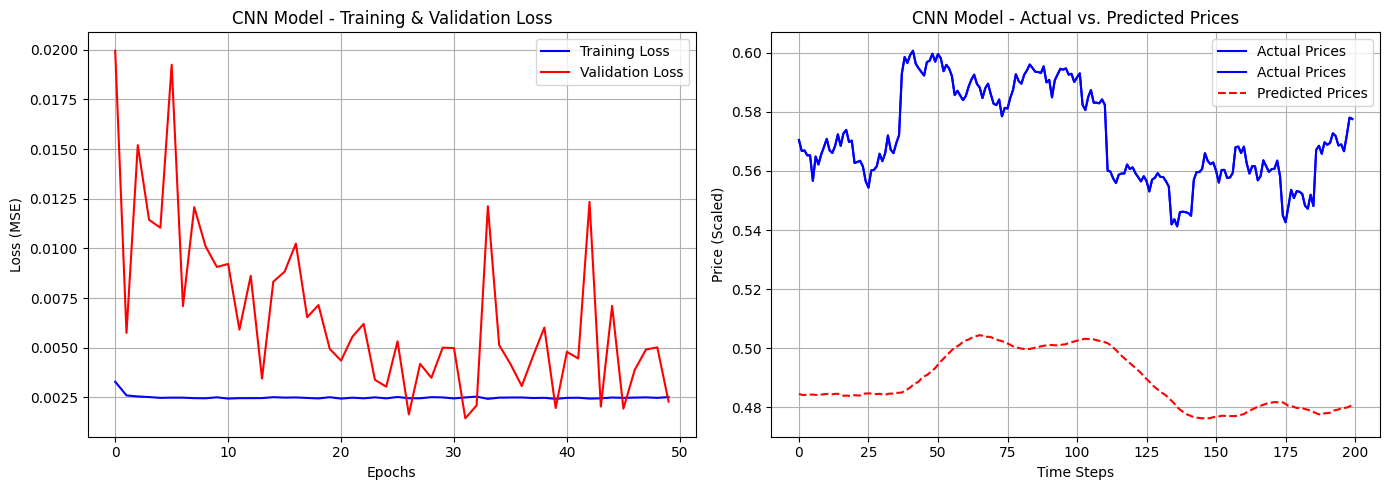

In [13]:
# Generating predictions
y_pred = model.predict(X_test)

plot_model_performance(history, y_test, y_pred, model_name="CNN Model")

#### GRU

In [6]:
import numpy as np

def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Define time steps
time_steps = 30  
X, y = create_sequences(df_sampled, target_column="Close_BTC", time_steps=time_steps)

# Train-test split (80% training, 20% testing)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

Training shape: (165568, 30, 11), (165568, 2)
Testing shape: (41393, 30, 11), (41393, 2)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, GRU
from keras.optimizers import Adam

# Hyperparameters
units = 50
output_size = 1
epochs = 50
batch_size = 16
learning_rate = 0.001

# Define model
model = Sequential()
model.add(GRU(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))

# Compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# Model summary
model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         9,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,501 (37.11 KB)

 Trainable params: 9,501 (37.11 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

# Save model checkpoints
checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5", 
                             monitor='val_loss', save_best_only=True, verbose=1)

# Log training history
csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/gru_btcpred_combined_log.csv")

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

Epoch 1/50
10347/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 1: val_loss improved from inf to 0.00000, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 0.0025 - val_loss: 2.8620e-06
Epoch 2/50
10336/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1503e-04
Epoch 2: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 2.1502e-04 - val_loss: 4.1100e-06
Epoch 3/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0835e-04
Epoch 3: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 2.0834e-04 - val_loss: 7.1178e-05
Epoch 4/50
10343/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0189e-04
Epoch 4: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 2.0189e-04 - val_loss: 1.1207e-05
Epoch 5/50
10345/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9318e-04
Epoch 5: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 1.9318e-04 - val_loss: 1.9328e-05
Epoch 6/50
10346/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8972e-04
E

10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 1.7812e-04 - val_loss: 2.8603e-06
Epoch 19/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7802e-04
Epoch 19: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7802e-04 - val_loss: 1.2634e-05
Epoch 20/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7482e-04
Epoch 20: val_loss improved from 0.00000 to 0.00000, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7482e-04 - val_loss: 2.7350e-06
Epoch 21/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7713e-04
Epoch 21: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7713e-04 - val_loss: 7.8588e-06
Epoch 22/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7841e-04
Epoch 22: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7841e-04 - val_loss: 3.7387e-06
Epoch 23/50
10340/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7931e-04
Epoch 23: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7930e-04 - val_loss: 7.7659e-06
Epoch 24/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7255e-04
Epoch 24: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7255e-04 - val_loss: 5.5761e-06
Epoch 25/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7231e-04 - val_loss: 2.5915e-06
Epoch 41/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7125e-04
Epoch 41: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7125e-04 - val_loss: 1.9812e-05
Epoch 42/50
10341/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7412e-04
Epoch 42: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7412e-04 - val_loss: 4.4129e-06
Epoch 43/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7044e-04
Epoch 43: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7044e-04 - val_loss: 3.7472e-05
Epoch 44/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7067e-04
Epoch 44: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7067e-04 - val_loss: 4.1496e-06
Epoch 45/50
10346/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

1294/1294 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


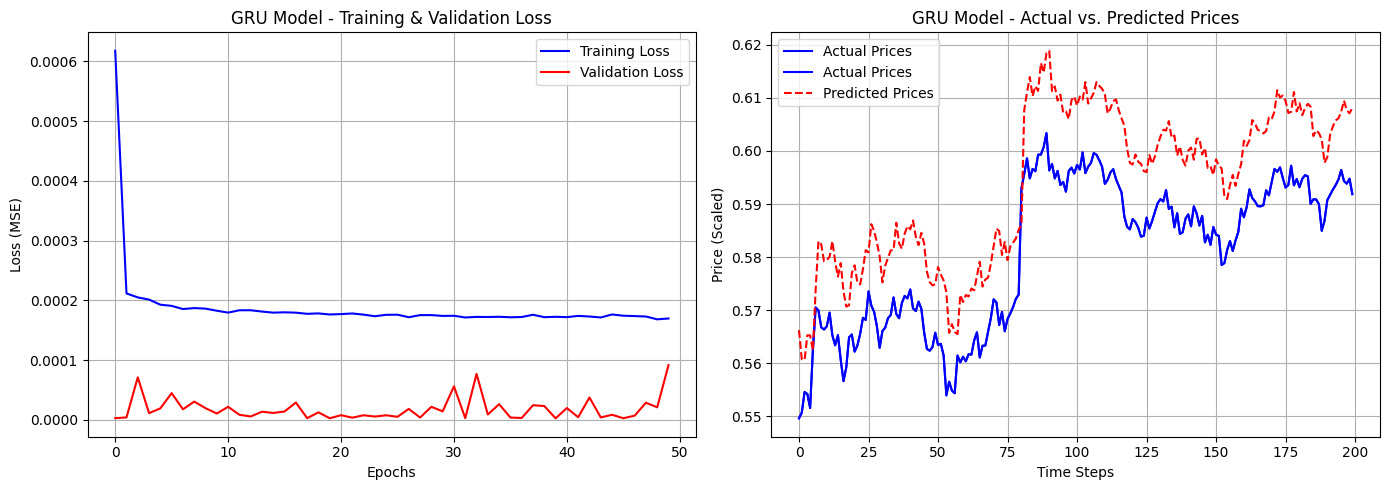

In [9]:
y_pred = model.predict(X_test)

plot_model_performance(history, y_test, y_pred, model_name="GRU Model")

#### TRANSFORMERS

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from finta import TA

In [6]:
# Converting sampled_df to a NumPy array
data = df_sampled.values 

# Defining train, validation, and test split sizes
train_size = int(0.8 * len(data)) 
val_size = int(0.1 * len(data)) 
test_size = len(data) - train_size - val_size 

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

train_tensor = torch.tensor(train_data, dtype=torch.float32)
val_tensor = torch.tensor(val_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)

print(f"Train tensor shape: {train_tensor.shape}")
print(f"Validation tensor shape: {val_tensor.shape}")
print(f"Test tensor shape: {test_tensor.shape}")

Train tensor shape: torch.Size([165592, 11])
Validation tensor shape: torch.Size([20699, 11])
Test tensor shape: torch.Size([20700, 11])


In [7]:
def create_sequences(data, seq_length=10):
    """Splits the dataset into sequences for the Transformer model."""
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return torch.stack(sequences), torch.stack(labels)

seq_length = 10 

X_train, y_train = create_sequences(train_tensor, seq_length)
X_val, y_val = create_sequences(val_tensor, seq_length)
X_test, y_test = create_sequences(test_tensor, seq_length)

In [8]:
class TransformerModel(nn.Module):
    def __init__(self, num_features, d_model=64, nhead=8, num_encoder_layers=4, num_decoder_layers=4, dim_feedforward=128, dropout=0.1):
        super(TransformerModel, self).__init__()

        self.encoder = nn.Linear(num_features, d_model)
        self.positional_encoding = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer = nn.Transformer(d_model=d_model, nhead=nhead, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward, dropout=dropout)

        self.decoder = nn.Linear(d_model, num_features)

    def forward(self, src, tgt):
        src = self.encoder(src)
        tgt = self.encoder(tgt)
        
        output = self.transformer(src, tgt)
        output = self.decoder(output)
        return output

# Model hyperparameters
num_features = train_tensor.shape[1]
model = TransformerModel(num_features)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Model Summary
print(summary(model, [(10, num_features), (10, num_features)]))

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'size'

## NEW VERSION: % MOVEMENT 

### Loading Data

In [10]:
# Define the directory containing processed data files
PROCESSED_DATA = os.path.join("data", "processed-data")

# File paths for the processed data files
btc_processed_file = os.path.join(PROCESSED_DATA, "btc_1min_processed.csv.gz")
eth_processed_file = os.path.join(PROCESSED_DATA, "eth_1min_processed.csv.gz")
combined_file = os.path.join(PROCESSED_DATA, "crypto_1min_combined.csv.gz")
NEWS_FILTERED_CSV = os.path.join(PROCESSED_DATA, "aggregated-news_filtered.csv.gz")

# Read the processed CSV files using gzip compression
btc_df = pd.read_csv(btc_processed_file, compression="gzip")
eth_df = pd.read_csv(eth_processed_file, compression="gzip")
crypto_df = pd.read_csv(combined_file, compression="gzip")
df_filtered_news = pd.read_csv(NEWS_FILTERED_CSV, compression="gzip")

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed-data/btc_1min_processed.csv.gz'

Zain, my computer is struggling to download these for some reason. Will try again on my other comp. In the meantime, pulling in preprocessed data from above ^ for testing. 

In [1]:
import os
import pandas as pd

# Define file path
file_path = "/Users/halladaykinsey/Desktop/combined_crypto_data.csv"

# Check if saved file exists
if os.path.exists(file_path):
    print("✅ Loading pre-saved dataset...")
    combined_df = pd.read_csv(file_path, parse_dates=["Datetime"])
else:
    print("⚠️ File not found. Merging raw BTC & ETH data...")
    combined_df = pd.merge(btc_df, eth_df, on="Datetime", suffixes=("_BTC", "_ETH"))
    combined_df.to_csv(file_path, index=False)  # Save for next time

# Confirm dataset loaded
print(f"Dataset Loaded: {combined_df.shape}")

✅ Loading pre-saved dataset...
Dataset Loaded: (2069909, 13)


In [2]:
# % change (Open to Close) for both BTC & ETH
combined_df["Pct_Change_OC_BTC"] = ((combined_df["Close_BTC"] - combined_df["Open_BTC"]) / combined_df["Open_BTC"]) * 100
combined_df["Pct_Change_OC_ETH"] = ((combined_df["Close_ETH"] - combined_df["Open_ETH"]) / combined_df["Open_ETH"]) * 100

# Shift percentage change to use yesterday’s data as a feature
combined_df["Prev_Pct_Change_OC_BTC"] = combined_df["Pct_Change_OC_BTC"].shift(1)
combined_df["Prev_Pct_Change_OC_ETH"] = combined_df["Pct_Change_OC_ETH"].shift(1)

# Define target as today's % change for BTC
combined_df["Target_Pct_Change_OC_BTC"] = combined_df["Pct_Change_OC_BTC"]

combined_df.dropna(inplace=True)

In [3]:
# Features: Mix of absolute values & previous % change
features = [
    "Prev_Pct_Change_OC_BTC", "Prev_Pct_Change_OC_ETH",  # Yesterday’s movement
    "Open_BTC", "High_BTC", "Low_BTC", "Close_BTC", "Volume_BTC",  # BTC Features
    "Open_ETH", "High_ETH", "Low_ETH", "Close_ETH", "Volume_ETH"   # ETH Features
]

# Target: Predict today's BTC % change
target_column = "Target_Pct_Change_OC_BTC"

# Filter dataset
df = combined_df[features + [target_column]].copy()

df.dropna(inplace=True)

print(df.head())

   Prev_Pct_Change_OC_BTC  Prev_Pct_Change_OC_ETH  Open_BTC  High_BTC  \
1                     0.0                     inf    457.00    457.00   
2                     0.0              -16.666667    457.00    457.00   
3                     0.0                0.000000    456.59    456.59   
4                     0.0                0.000000    456.59    456.59   
5                     0.0                0.000000    457.00    457.41   

   Low_BTC  Close_BTC  Volume_BTC  Open_ETH  High_ETH  Low_ETH  Close_ETH  \
1   457.00     457.00    0.000000      12.0      12.0     10.0       10.0   
2   457.00     457.00    0.000000      10.0      10.0     10.0       10.0   
3   456.59     456.59    0.022236      10.0      10.0     10.0       10.0   
4   456.59     456.59    0.000000      10.0      10.0     10.0       10.0   
5   457.00     457.41    0.460653      10.0      10.0     10.0       10.0   

   Volume_ETH  Target_Pct_Change_OC_BTC  
1   43.497506                  0.000000  
2    8.000000 

In [4]:
import numpy as np

# Check for infinity values
print("🔍 Checking for infinity values in dataset...")
print(np.isinf(df).sum())  # Count of inf values per column

# Check for NaNs
print("\n🔍 Checking for NaNs in dataset...")
print(df.isna().sum())

# Check max & min values
print("\n🔍 Maximum and minimum values before scaling:")
print(df.describe())

🔍 Checking for infinity values in dataset...
Prev_Pct_Change_OC_BTC      0
Prev_Pct_Change_OC_ETH      1
Open_BTC                    0
High_BTC                    0
Low_BTC                     0
Close_BTC                   0
Volume_BTC                  0
Open_ETH                    0
High_ETH                    0
Low_ETH                     0
Close_ETH                   0
Volume_ETH                  0
Target_Pct_Change_OC_BTC    0
dtype: int64

🔍 Checking for NaNs in dataset...
Prev_Pct_Change_OC_BTC      0
Prev_Pct_Change_OC_ETH      0
Open_BTC                    0
High_BTC                    0
Low_BTC                     0
Close_BTC                   0
Volume_BTC                  0
Open_ETH                    0
High_ETH                    0
Low_ETH                     0
Close_ETH                   0
Volume_ETH                  0
Target_Pct_Change_OC_BTC    0
dtype: int64

🔍 Maximum and minimum values before scaling:


/Users/halladaykinsey/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Prev_Pct_Change_OC_BTC  Prev_Pct_Change_OC_ETH      Open_BTC  \
count            2.069908e+06            2.069908e+06  2.069908e+06   
mean            -6.945846e-04                     inf  5.481633e+03   
std              1.311872e-01                     NaN  3.771505e+03   
min             -8.734926e+00           -3.034056e+01  4.350000e+02   
25%             -2.821575e-02            0.000000e+00  1.484000e+03   
50%              0.000000e+00            0.000000e+00  5.896500e+03   
75%              2.891656e-02            0.000000e+00  8.187910e+03   
max              1.051216e+01                     inf  1.966576e+04   

           High_BTC       Low_BTC     Close_BTC    Volume_BTC      Open_ETH  \
count  2.069908e+06  2.069908e+06  2.069908e+06  2.069908e+06  2.069908e+06   
mean   5.485535e+03  5.477418e+03  5.481543e+03  6.665729e+00  2.401004e+02   
std    3.775284e+03  3.767285e+03  3.771408e+03  1.789666e+01  2.368689e+02   
min    4.351300e+02  4.350000e+02  4.350000e

In [5]:
import numpy as np

# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)  

print("✅ After Cleaning: Checking for Infs and NaNs Again...")
print(df.isna().sum())  
print(np.isinf(df).sum())  

✅ After Cleaning: Checking for Infs and NaNs Again...
Prev_Pct_Change_OC_BTC      0
Prev_Pct_Change_OC_ETH      0
Open_BTC                    0
High_BTC                    0
Low_BTC                     0
Close_BTC                   0
Volume_BTC                  0
Open_ETH                    0
High_ETH                    0
Low_ETH                     0
Close_ETH                   0
Volume_ETH                  0
Target_Pct_Change_OC_BTC    0
dtype: int64
Prev_Pct_Change_OC_BTC      0
Prev_Pct_Change_OC_ETH      0
Open_BTC                    0
High_BTC                    0
Low_BTC                     0
Close_BTC                   0
Volume_BTC                  0
Open_ETH                    0
High_ETH                    0
Low_ETH                     0
Close_ETH                   0
Volume_ETH                  0
Target_Pct_Change_OC_BTC    0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initializing scaler
scaler = MinMaxScaler()

# Copy dataset and scale only feature columns
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

print(df_scaled.head())

   Prev_Pct_Change_OC_BTC  Prev_Pct_Change_OC_ETH  Open_BTC  High_BTC  \
2                0.453831                0.176801  0.001144  0.001137   
3                0.453831                0.392298  0.001123  0.001116   
4                0.453831                0.392298  0.001123  0.001116   
5                0.453831                0.392298  0.001144  0.001159   
6                0.458492                0.392298  0.001169  0.001162   

    Low_BTC  Close_BTC  Volume_BTC  Open_ETH  High_ETH   Low_ETH  Close_ETH  \
2  0.001145   0.001144    0.000000  0.002836  0.002836  0.002836   0.002836   
3  0.001124   0.001123    0.000014  0.002836  0.002836  0.002836   0.002836   
4  0.001124   0.001123    0.000000  0.002836  0.002836  0.002836   0.002836   
5  0.001145   0.001165    0.000285  0.002836  0.002836  0.002836   0.002836   
6  0.001167   0.001166    0.000673  0.002836  0.002836  0.002836   0.002836   

   Volume_ETH  Target_Pct_Change_OC_BTC  
2    0.000029                  0.000000  
3 

In [7]:
# Ensure sorted by datetime before sampling to maintain time structure
df_scaled = df_scaled.sort_index()

# Take a 10% sample while preserving order
sample_fraction = 0.1  # 10% of the data
df_sampled = df_scaled.iloc[:int(len(df_scaled) * sample_fraction)].copy()

# Confirm new shape
print(f"Original dataset size: {df_scaled.shape}")
print(f"Sampled dataset size: {df_sampled.shape}")

Original dataset size: (2069907, 13)
Sampled dataset size: (206990, 13)


### GRU

We will use a single-layer GRU with 50 units, a dropout rate of 0.2, and a tanh activation function to capture non-linearity.

In [8]:
def create_sequences(data, target_column, time_steps=30):
    """Creates sequences of time_steps to use as input for the GRU model."""
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Define number of time steps (e.g., using past 30 days of data)
time_steps = 30  
X, y = create_sequences(df_sampled[features + [target_column]], target_column=target_column, time_steps=time_steps)

print(f"Feature shape: {X.shape}, Target shape: {y.shape}")

Feature shape: (206960, 30, 13), Target shape: (206960,)


In [9]:
# 80% training, 20% testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

Training shape: (165568, 30, 13), (165568,)
Testing shape: (41392, 30, 13), (41392,)


In [10]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

In [11]:
# Hyperparameters
units = 50
output_size = 1 
epochs = 50
batch_size = 16
learning_rate = 0.001

# Defining 
model = Sequential()
model.add(GRU(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))

# Compile Model
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         9,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,801 (38.29 KB)

 Trainable params: 9,801 (38.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Saving model and logs
model_path = "/Users/halladaykinsey/capstone-project/capstone-models/models/gru3_model.h5"
log_path = "/Users/halladaykinsey/capstone-project/capstone-models/logs/gru3_log.csv"

checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

csv_logger = CSVLogger(log_path)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

Epoch 1/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138
Epoch 1: val_loss improved from inf to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/gru3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - loss: 0.0138 - val_loss: 0.0050
Epoch 2/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132
Epoch 2: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.0132 - val_loss: 0.0050
Epoch 3/50
10347/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135
Epoch 3: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0135 - val_loss: 0.0050
Epoch 4/50
10341/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139
Epoch 4: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0139 - val_loss: 0.0050
Epoch 5/50
10337/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134
Epoch 5: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0134 - val_loss: 0.0050
Epoch 6/50
10337/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140
Epoch 6: val_loss did not improve from 0.00505
10348/1034

#### Breakpoint: Model Eval Function

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_model_performance(history, y_test, y_pred, model_name="Model"):
    """
    Plots model training loss, actual vs predicted values, and residual errors.
    
    Parameters:
    - history: Training history from model.fit()
    - y_test: True values from test dataset
    - y_pred: Model predictions
    - model_name: Name of the model for labeling the plots
    """

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training & Validation Loss Plot
    axes[0].plot(history.history['loss'], label="Training Loss", color='blue')
    axes[0].plot(history.history['val_loss'], label="Validation Loss", color='red')
    axes[0].set_title(f"{model_name} - Training & Validation Loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss (MSE)")
    axes[0].legend()
    axes[0].grid(True)

    # Actual vs. Predicted Plot
    axes[1].plot(y_test, label="Actual % Change", color='blue')
    axes[1].plot(y_pred, label="Predicted % Change", linestyle="dashed", color='red')
    axes[1].set_title(f"{model_name} - Actual vs. Predicted % Change")
    axes[1].set_xlabel("Time Steps")
    axes[1].set_ylabel("Percentage Change")
    axes[1].legend()
    axes[1].grid(True)

    plt.show()

    # Residual Errors Plot (Distribution of Prediction Errors)
    residuals = y_test - y_pred.flatten()
    plt.figure(figsize=(7, 4))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"{model_name} - Residual Distribution (Errors)")
    plt.xlabel("Residual Error")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

1294/1294 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


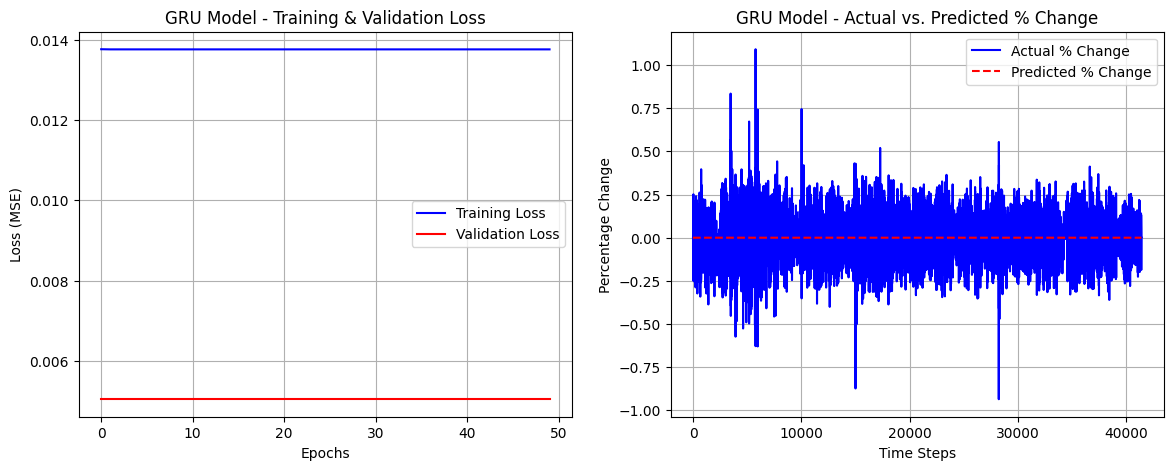

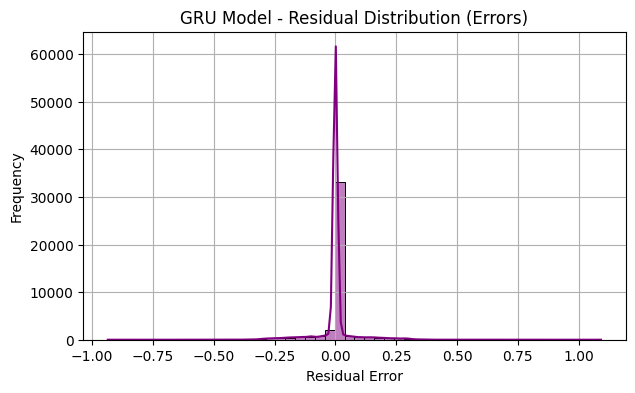

In [15]:
# Generate predictions
y_pred = model.predict(X_test)

# Call the visualization function
plot_model_performance(history, y_test, y_pred, model_name="GRU Model")

### CNN

In [16]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger

# CNN
cnn_model = Sequential()

# 1st Conv1D Layer
cnn_model.add(Conv1D(filters=8, kernel_size=3, strides=1, activation='relu', 
                      input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_model.add(Dropout(0.3))

# 2nd Conv1D Layer
cnn_model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
cnn_model.add(Dropout(0.3))

# Flatten dense output
cnn_model.add(Flatten())

# Fully Connected Layers
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='linear'))

# Compile
cnn_model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

cnn_model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 8)          │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 26, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        13,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,097 (55.07 KB)

 Trainable params: 14,097 (55.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import os

os.makedirs("/Users/halladaykinsey/capstone-project/capstone-models/models", exist_ok=True)
os.makedirs("/Users/halladaykinsey/capstone-project/capstone-models/logs", exist_ok=True)

# Model checkpoints
cnn_checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/cnn3_model.h5", 
                                 monitor='val_loss', save_best_only=True, verbose=1)

# Training history
cnn_csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/cnn3_log.csv")


In [18]:
# Train the CNN model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=50, 
    batch_size=16,  
    validation_data=(X_test, y_test),
    callbacks=[cnn_checkpoint, cnn_csv_logger],
    verbose=1
)

Epoch 1/50
10302/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0140
Epoch 1: val_loss improved from inf to 0.00507, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0140 - val_loss: 0.0051
Epoch 2/50
10325/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137
Epoch 2: val_loss improved from 0.00507 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0137 - val_loss: 0.0050
Epoch 3/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135
Epoch 3: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0135 - val_loss: 0.0051
Epoch 4/50
10341/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0132
Epoch 4: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0132 - val_loss: 0.0051
Epoch 5/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0142
Epoch 5: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0142 - val_loss: 0.0051
Epoch 6/50
10298/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0138
Epoch 6: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0138 - val_loss: 0.0051
Epoch 7/50
10305/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0134
Epoch 7: val_loss did not improve from 0.00505
10

10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0137 - val_loss: 0.0050
Epoch 9/50
10310/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0134
Epoch 9: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0134 - val_loss: 0.0051
Epoch 10/50
10306/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0138
Epoch 10: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0138 - val_loss: 0.0051
Epoch 11/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0137
Epoch 11: val_loss improved from 0.00505 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0137 - val_loss: 0.0050
Epoch 12/50
10327/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0137
Epoch 12: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 13/50
10302/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0133
Epoch 13: val_loss improved from 0.00505 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0133 - val_loss: 0.0050
Epoch 14/50
10300/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0130
Epoch 14: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 992us/step - loss: 0.0130 - val_loss: 0.0051
Epoch 15/50
10343/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0144
Epoch 15: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 997us/step - loss: 0.0144 - val_loss: 0.0051
Epoch 16/50
10328/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0138
Epoch 16: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 10s 994us/step - loss: 0.0138 - val_loss: 0.0051
Epoch 17/50
10347/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0145
Epoch 17: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0145 - val_loss: 0.0051
Epoch 18/50
10294/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0137
Epoch 18: val_loss did not improve

1294/1294 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step


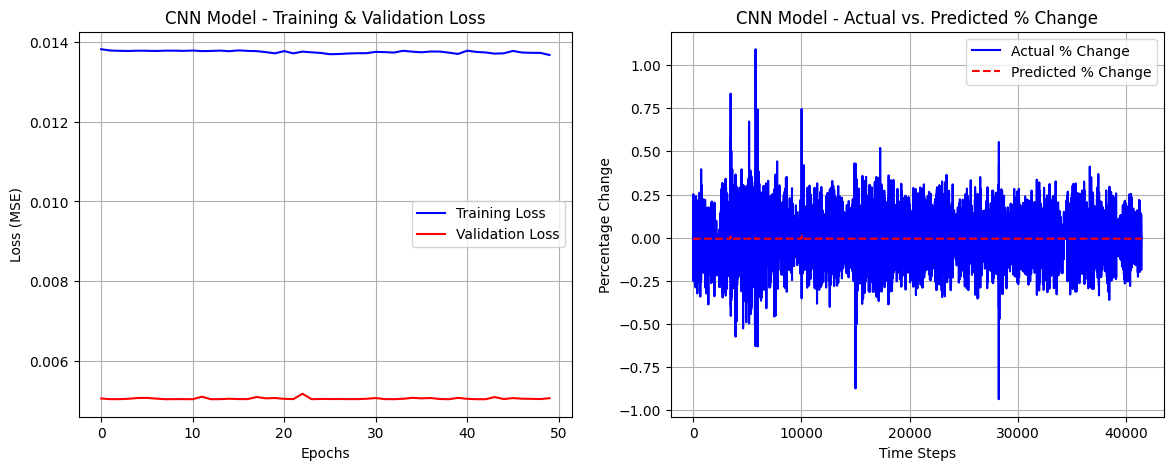

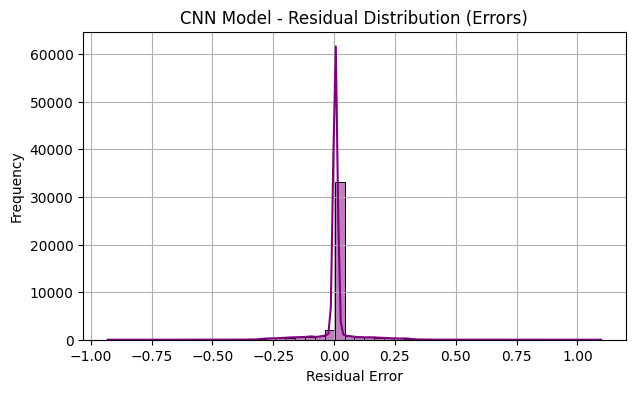

In [19]:
# Generate Predictions
y_pred_cnn = cnn_model.predict(X_test)

# Plot CNN Model Performance
plot_model_performance(cnn_history, y_test, y_pred_cnn, model_name="CNN Model")

### RNN

In [20]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

# RNN
rnn_model = Sequential()

# 1st RNN Layer
rnn_model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, 
                         input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dropout(0.2))

# Fully Connected Layer
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='linear'))

# Compile 
rnn_model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

rnn_model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Ensure directories exist
os.makedirs("/Users/halladaykinsey/capstone-project/capstone-models/models", exist_ok=True)
os.makedirs("/Users/halladaykinsey/capstone-project/capstone-models/logs", exist_ok=True)

rnn_checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5", 
                                 monitor='val_loss', save_best_only=True, verbose=1)

rnn_csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/rnn3_log.csv")


In [22]:
# Train the RNN model
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50,  
    batch_size=16,  
    validation_data=(X_test, y_test),
    callbacks=[rnn_checkpoint, rnn_csv_logger],
    verbose=1
)

Epoch 1/50
10342/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152
Epoch 1: val_loss improved from inf to 0.00510, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0152 - val_loss: 0.0051
Epoch 2/50
10334/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140
Epoch 2: val_loss improved from 0.00510 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0140 - val_loss: 0.0050
Epoch 3/50
10331/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 3: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 4/50
10328/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141
Epoch 4: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0141 - val_loss: 0.0051
Epoch 5/50
10324/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146
Epoch 5: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0146 - val_loss: 0.0051
Epoch 6/50
10333/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 6: val_loss improved from 0.00505 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0135 - val_loss: 0.0050
Epoch 7/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 7: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 8/50
10333/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139
Epoch 8: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0139 - val_loss: 0.0051
Epoch 9/50
10340/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133
Epoch 9: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0134 - val_loss: 0.0051
Epoch 10/50
10334/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 10: val_loss improved from 0.00505 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0138 - val_loss: 0.0050
Epoch 11/50
10337/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143
Epoch 11: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0143 - val_loss: 0.0051
Epoch 12/50
10341/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 12: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 13/50
10345/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 13: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 14/50
10335/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140
Epoch 14: val_loss improved from 0.00505 to 0.00505, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/rnn3_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0140 - val_loss: 0.0050
Epoch 15/50
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 15: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 16/50
10329/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139
Epoch 16: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0139 - val_loss: 0.0051
Epoch 17/50
10332/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 17: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0138 - val_loss: 0.0051
Epoch 18/50
10337/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 18: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 19/50
10331/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139
Epoch 19: val_loss did not improve from 0.00505


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0138 - val_loss: 0.0050
Epoch 24/50
10336/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 24: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 25/50
10329/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 25: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0138 - val_loss: 0.0050
Epoch 26/50
10326/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 26: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0137 - val_loss: 0.0051
Epoch 27/50
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142
Epoch 27: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0142 - val_loss: 0.0051
Epoch 28/50
10340/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136
Epoch 28: val_loss did not improve from 0.00505


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0137 - val_loss: 0.0050
Epoch 34/50
10346/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141
Epoch 34: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0141 - val_loss: 0.0051
Epoch 35/50
10334/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133
Epoch 35: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0133 - val_loss: 0.0050
Epoch 36/50
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 36: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0137 - val_loss: 0.0050
Epoch 37/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141
Epoch 37: val_loss did not improve from 0.00505
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0141 - val_loss: 0.0050
Epoch 38/50
10327/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 38: val_loss did not improve from 0.00505


1294/1294 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step


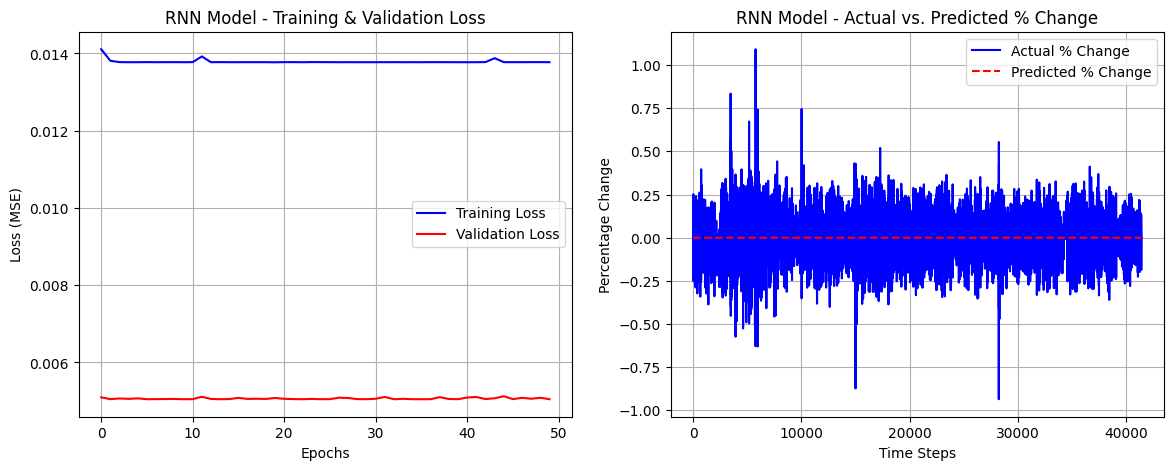

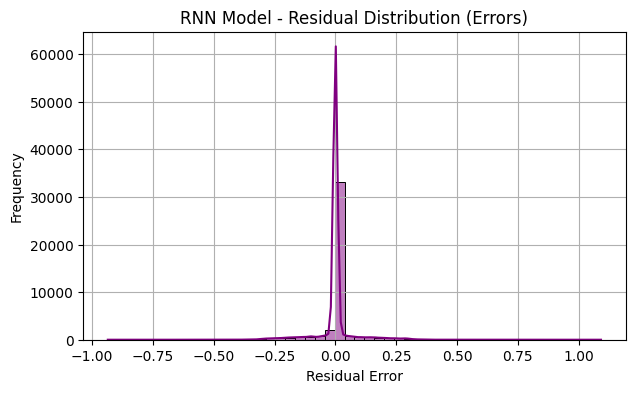

In [23]:
# Generate Predictions
y_pred_rnn = rnn_model.predict(X_test)

# Plot RNN Model Performance
plot_model_performance(rnn_history, y_test, y_pred_rnn, model_name="RNN Model")

### Transformers

In [26]:
pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 8.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 16.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.data import Dataset, DataLoader

# Transformer Model Class
class BTCPriceTransformer(pl.LightningModule):
    def __init__(self, input_dim, seq_len):
        super().__init__()

        self.batch_size = 64
        self.d_model = 128 
        self.nhead = 8 
        self.dim_feedforward = 512
        self.dropout = 0.1
        self.num_layers = 6
        self.seq_len = seq_len

        # Positional Encoding
        self.pos_encoder = PositionalEncoding(self.d_model, self.dropout)

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.d_model,
            nhead=self.nhead,
            dim_feedforward=self.dim_feedforward,
            dropout=self.dropout,
            activation="gelu",
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=self.num_layers)

        # Fully Connected Layers
        self.input_fc = nn.Linear(input_dim, self.d_model)
        self.output_fc = nn.Linear(self.d_model, 1)  

    def forward(self, src):
        src = self.input_fc(src)
        src = self.pos_encoder(src)

        # Transformer Encoder
        out = self.transformer_encoder(src)
        out = self.output_fc(out[-1])  
        return out

    def training_step(self, batch, batch_idx):
        src, tgt = batch
        pred = self(src)
        loss = nn.MSELoss()(pred, tgt)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        src, tgt = batch
        pred = self(src)
        loss = nn.MSELoss()(pred, tgt)
        self.log("val_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
        scheduler = OneCycleLR(optimizer, max_lr=1e-3, total_steps=30)
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]
    
    

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
import torch

# Ensure the target is 2D (batch, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

print(f"New X_train shape: {X_train_torch.shape}")
print(f"New y_train shape: {y_train_torch.shape}")

New X_train shape: torch.Size([165568, 30, 13])
New y_train shape: torch.Size([165568, 1])


In [35]:
class BTCPriceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Convert Sequences to PyTorch Format
train_dataset = BTCPriceDataset(X_train, y_train)
test_dataset = BTCPriceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [30]:
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pe", pe, persistent=False)

    def forward(self, x):
        x = x + self.pe[: x.size(0), :]
        return self.dropout(x)


In [36]:
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning import Trainer

# Define Paths
model_checkpoint_path = "/Users/halladaykinsey/capstone-project/capstone-models/models/transformer3_model.ckpt"
log_dir = "/Users/halladaykinsey/capstone-project/capstone-models/logs/"
log_file = "transformer3_log.csv"

# Define Checkpoint Callback 
checkpoint_callback = ModelCheckpoint(
    dirpath=os.path.dirname(model_checkpoint_path),
    filename=os.path.basename(model_checkpoint_path).replace(".ckpt", ""),
    monitor="val_loss",
    save_top_k=1,
    mode="min"
)

# Define CSV Logger
csv_logger = CSVLogger(save_dir=log_dir, name=log_file.replace(".csv", ""))

# Initialize Model
model = BTCPriceTransformer(input_dim=X_train.shape[2], seq_len=X_train.shape[1])

# Train Model
trainer = Trainer(
    max_epochs=50,
    logger=csv_logger,
    callbacks=[checkpoint_callback, EarlyStopping(monitor="val_loss", patience=10, mode="min")]
)

trainer.fit(model, train_loader, test_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | pos_encoder         | PositionalEncoding | 0      | train
1 | transformer_encoder | TransformerEncoder | 1.2 M  | train
2 | input_fc            | Linear             | 1.8 K  | train
3 | output_fc           | Linear             | 129    | train
-------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.766     Total estimated model params size (MB)
66        Modules in train mode
0         Modules in eval mode


/Users/halladaykinsey/myenv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/halladaykinsey/myenv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 1:   0%|          | 0/2587 [00:00<?, ?it/s, v_num=1, train_loss=0.0065, val_loss=0.00505]           

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([48, 1, 1])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 22: 100%|██████████| 2587/2587 [14:17<00:00,  3.02it/s, v_num=1, train_loss=0.00679, val_loss=0.00505] 
